Индивидуальный проект: **Влияние загрязнения воздуха на рак легких**

Автор: **Нгуен Тан Зунг, Корниенко Никита**

Проверяющий: **Шпаковская Ирина Игоревна**

Ссылка на датасет: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

# План проекта

1. Цель и задачи исследования
2. Описание набора данных
3. Разведочный анализ данных
4. Создание модели
5. Выводы

# Цель и задачи исследования

Найти и обучить модели на предсказание рака легких.
Найти наиболее важные признаки рака.

In [ ]:
# Описание набора данных

- *patient_id* - ID пациента
- age - возраст пациента
- gender - пол
- air_pollution - уровень загрязнения воздуха
- alcohol_use - уровень алкоголизма
- dust_allergy - степень аллергии на пыль
- occupational_hazards - степень профессиональной опасности
- genetic_risk - уровень генетического риска
- chronic_lung_disease - степень хронических заболеваний легких
- balanced_diet - уровень сбалансированности питания
- obesity - степень ожирения
- smoking - степень курения
- passive_smoker - степень пассивного курения
- chest_pain - уровень боли в груди
- coughing_of_blood - уровень кашля с кровью
- fatigue - уровень усталости
- weight_loss - степень снижения веса
- shortess_of_breath - уровень одышки
- wheezing - уровень хрипов
- swallowing_difficulty - уровень сложности глотания
- clubbing_of_finger_nails - уровень клубков ногтей на руках
- frequent_cold - уровень подверженности холоду
- dry_cough - уровень сухого кашля
- snoring - уровень храпа

In [57]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score

from sklearn.metrics import f1_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

pd.set_option('display.max_columns', None)
#pd.set_option('max_colwidth', None)

In [58]:
from xgboost import XGBClassifier

In [59]:
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense, Dropout

In [60]:
df = pd.read_csv("/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv")
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [61]:
# приводим названия колонок к виду согласно PEP8
df.columns = [re.sub(r'[ /?+@()%#]', '_', x.lower().strip()) for x in df.columns]
df.sample(5)

,index,patient_id,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,smoking,passive_smoker,chest_pain,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
121,121,P207,48,1,6,7,7,7,7,6,7,7,7,8,7,7,5,3,2,7,8,2,4,5,3,High
25,25,P120,65,1,6,8,7,7,7,6,2,4,1,2,4,3,2,7,6,5,1,9,3,4,2,Medium
864,864,P877,44,1,6,7,7,7,7,6,7,7,7,8,7,7,5,3,2,7,8,2,4,5,3,High
248,248,P321,38,2,2,1,5,3,2,3,2,4,1,4,2,4,6,7,2,5,8,1,3,2,3,Medium
559,559,P601,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   patient_id                1000 non-null   object
 2   age                       1000 non-null   int64 
 3   gender                    1000 non-null   int64 
 4   air_pollution             1000 non-null   int64 
 5   alcohol_use               1000 non-null   int64 
 6   dust_allergy              1000 non-null   int64 
 7   occupational_hazards      1000 non-null   int64 
 8   genetic_risk              1000 non-null   int64 
 9   chronic_lung_disease      1000 non-null   int64 
 10  balanced_diet             1000 non-null   int64 
 11  obesity                   1000 non-null   int64 
 12  smoking                   1000 non-null   int64 
 13  passive_smoker            1000 non-null   int64 
 14  chest_pain               

В датафрейме 26 колонок: 24 типа данных int, 2 - object. Объем занимаемой памяти 203.3+ KB

In [63]:
df.isna().sum().sum() # пропуски отсутствуют

0

In [64]:
sum(df.duplicated()) # дубликатов нет

0

In [65]:
df.describe().round(1)

,index,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,smoking,passive_smoker,chest_pain,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,499.5,37.2,1.4,3.8,4.6,5.2,4.8,4.6,4.4,4.5,4.5,3.9,4.2,4.4,4.9,3.9,3.9,4.2,3.8,3.7,3.9,3.5,3.9,2.9
std,288.8,12.0,0.5,2.0,2.6,2.0,2.1,2.1,1.8,2.1,2.1,2.5,2.3,2.3,2.4,2.2,2.2,2.3,2.0,2.3,2.4,1.8,2.0,1.5
min,0.0,14.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,249.8,27.8,1.0,2.0,2.0,4.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
50%,499.5,36.0,1.0,3.0,5.0,6.0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0
75%,749.2,45.0,2.0,6.0,7.0,7.0,7.0,7.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,5.0,6.0,6.0,5.0,5.0,5.0,5.0,6.0,4.0
max,999.0,73.0,2.0,8.0,8.0,8.0,8.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,9.0,9.0,8.0,9.0,8.0,8.0,9.0,7.0,7.0,7.0


In [66]:
df.drop(['index', 'patient_id'], axis = 1, inplace = True)
# Убираем колонки, не несущие для нас информацию

In [67]:
df.level.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [68]:
df.replace({'level':{'Low': 0, 'Medium': 1, 'High': 2}}, inplace = True)
# Преобразуем категориальные признаки

In [69]:
df.level.value_counts()
# наблюдается небольшой дисбаланс классов

2    365
1    332
0    303
Name: level, dtype: int64

In [70]:
df.shape

(1000, 24)

### EDA

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'air_pollution'}>,
        <Axes: title={'center': 'alcohol_use'}>,
        <Axes: title={'center': 'dust_allergy'}>],
       [<Axes: title={'center': 'occupational_hazards'}>,
        <Axes: title={'center': 'genetic_risk'}>,
        <Axes: title={'center': 'chronic_lung_disease'}>,
        <Axes: title={'center': 'balanced_diet'}>,
        <Axes: title={'center': 'obesity'}>],
       [<Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'passive_smoker'}>,
        <Axes: title={'center': 'chest_pain'}>,
        <Axes: title={'center': 'coughing_of_blood'}>,
        <Axes: title={'center': 'fatigue'}>],
       [<Axes: title={'center': 'weight_loss'}>,
        <Axes: title={'center': 'shortness_of_breath'}>,
        <Axes: title={'center': 'wheezing'}>,
        <Axes: title={'center': 'swallowing_difficulty'}>,
        <Axes: title={'center': 'clubbing_of

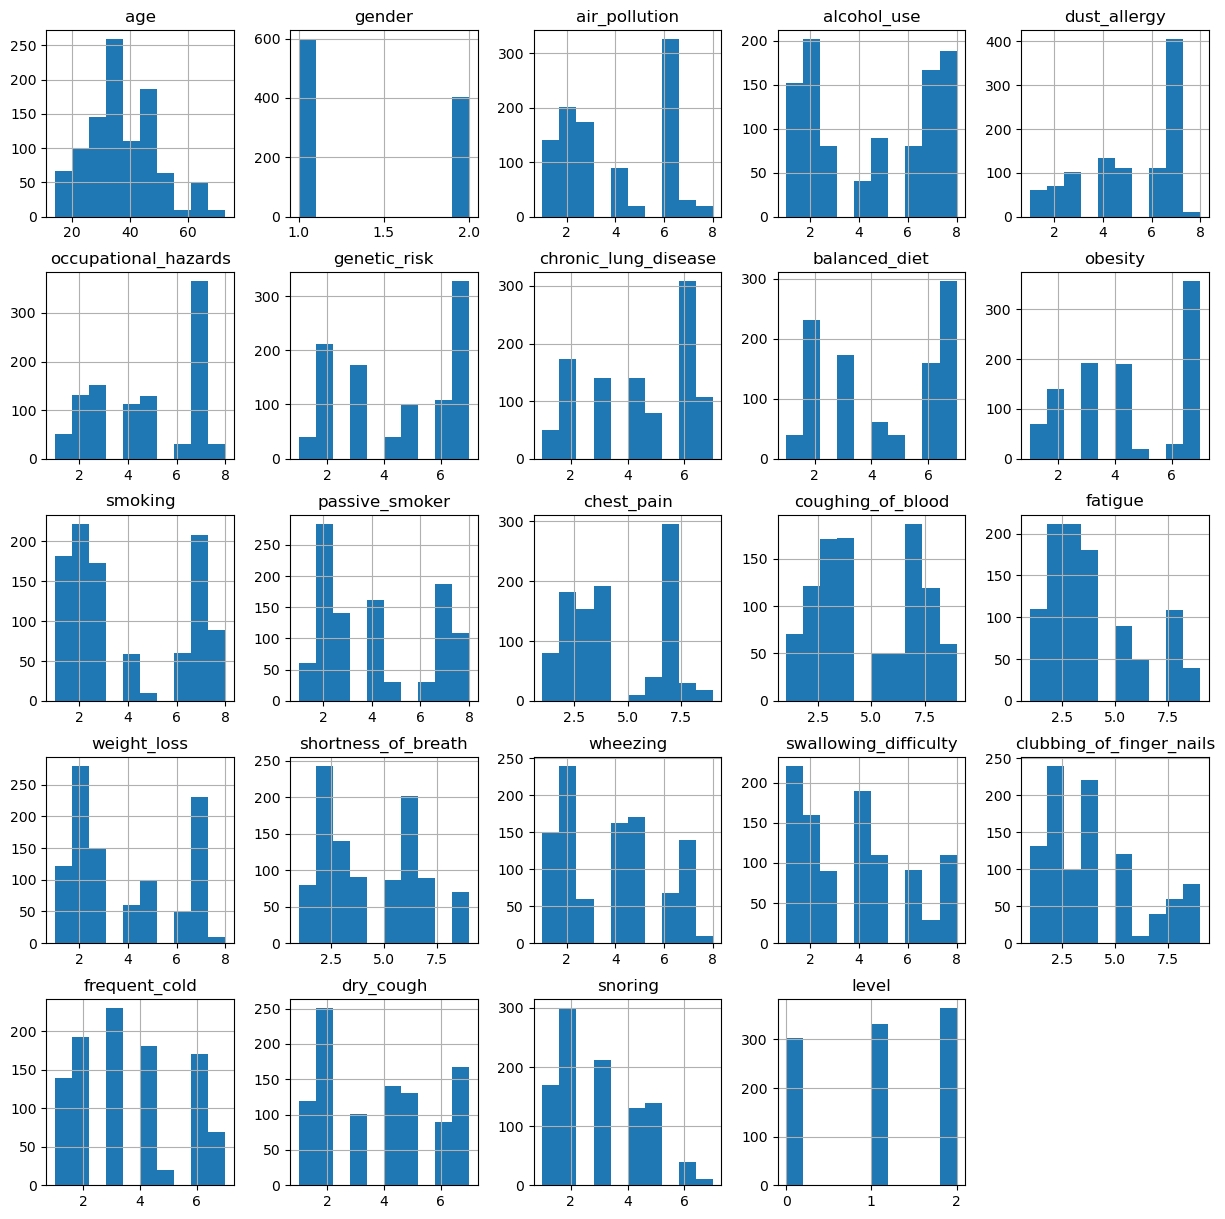

In [71]:
df.hist(figsize=(15, 15))

<Axes: >

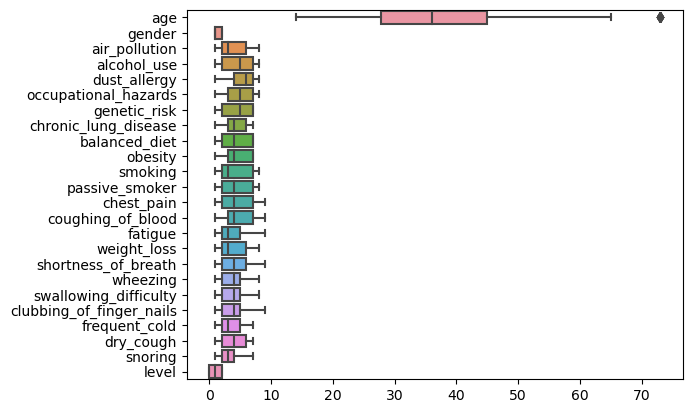

In [72]:
sns.boxplot(df, orient= 'h')

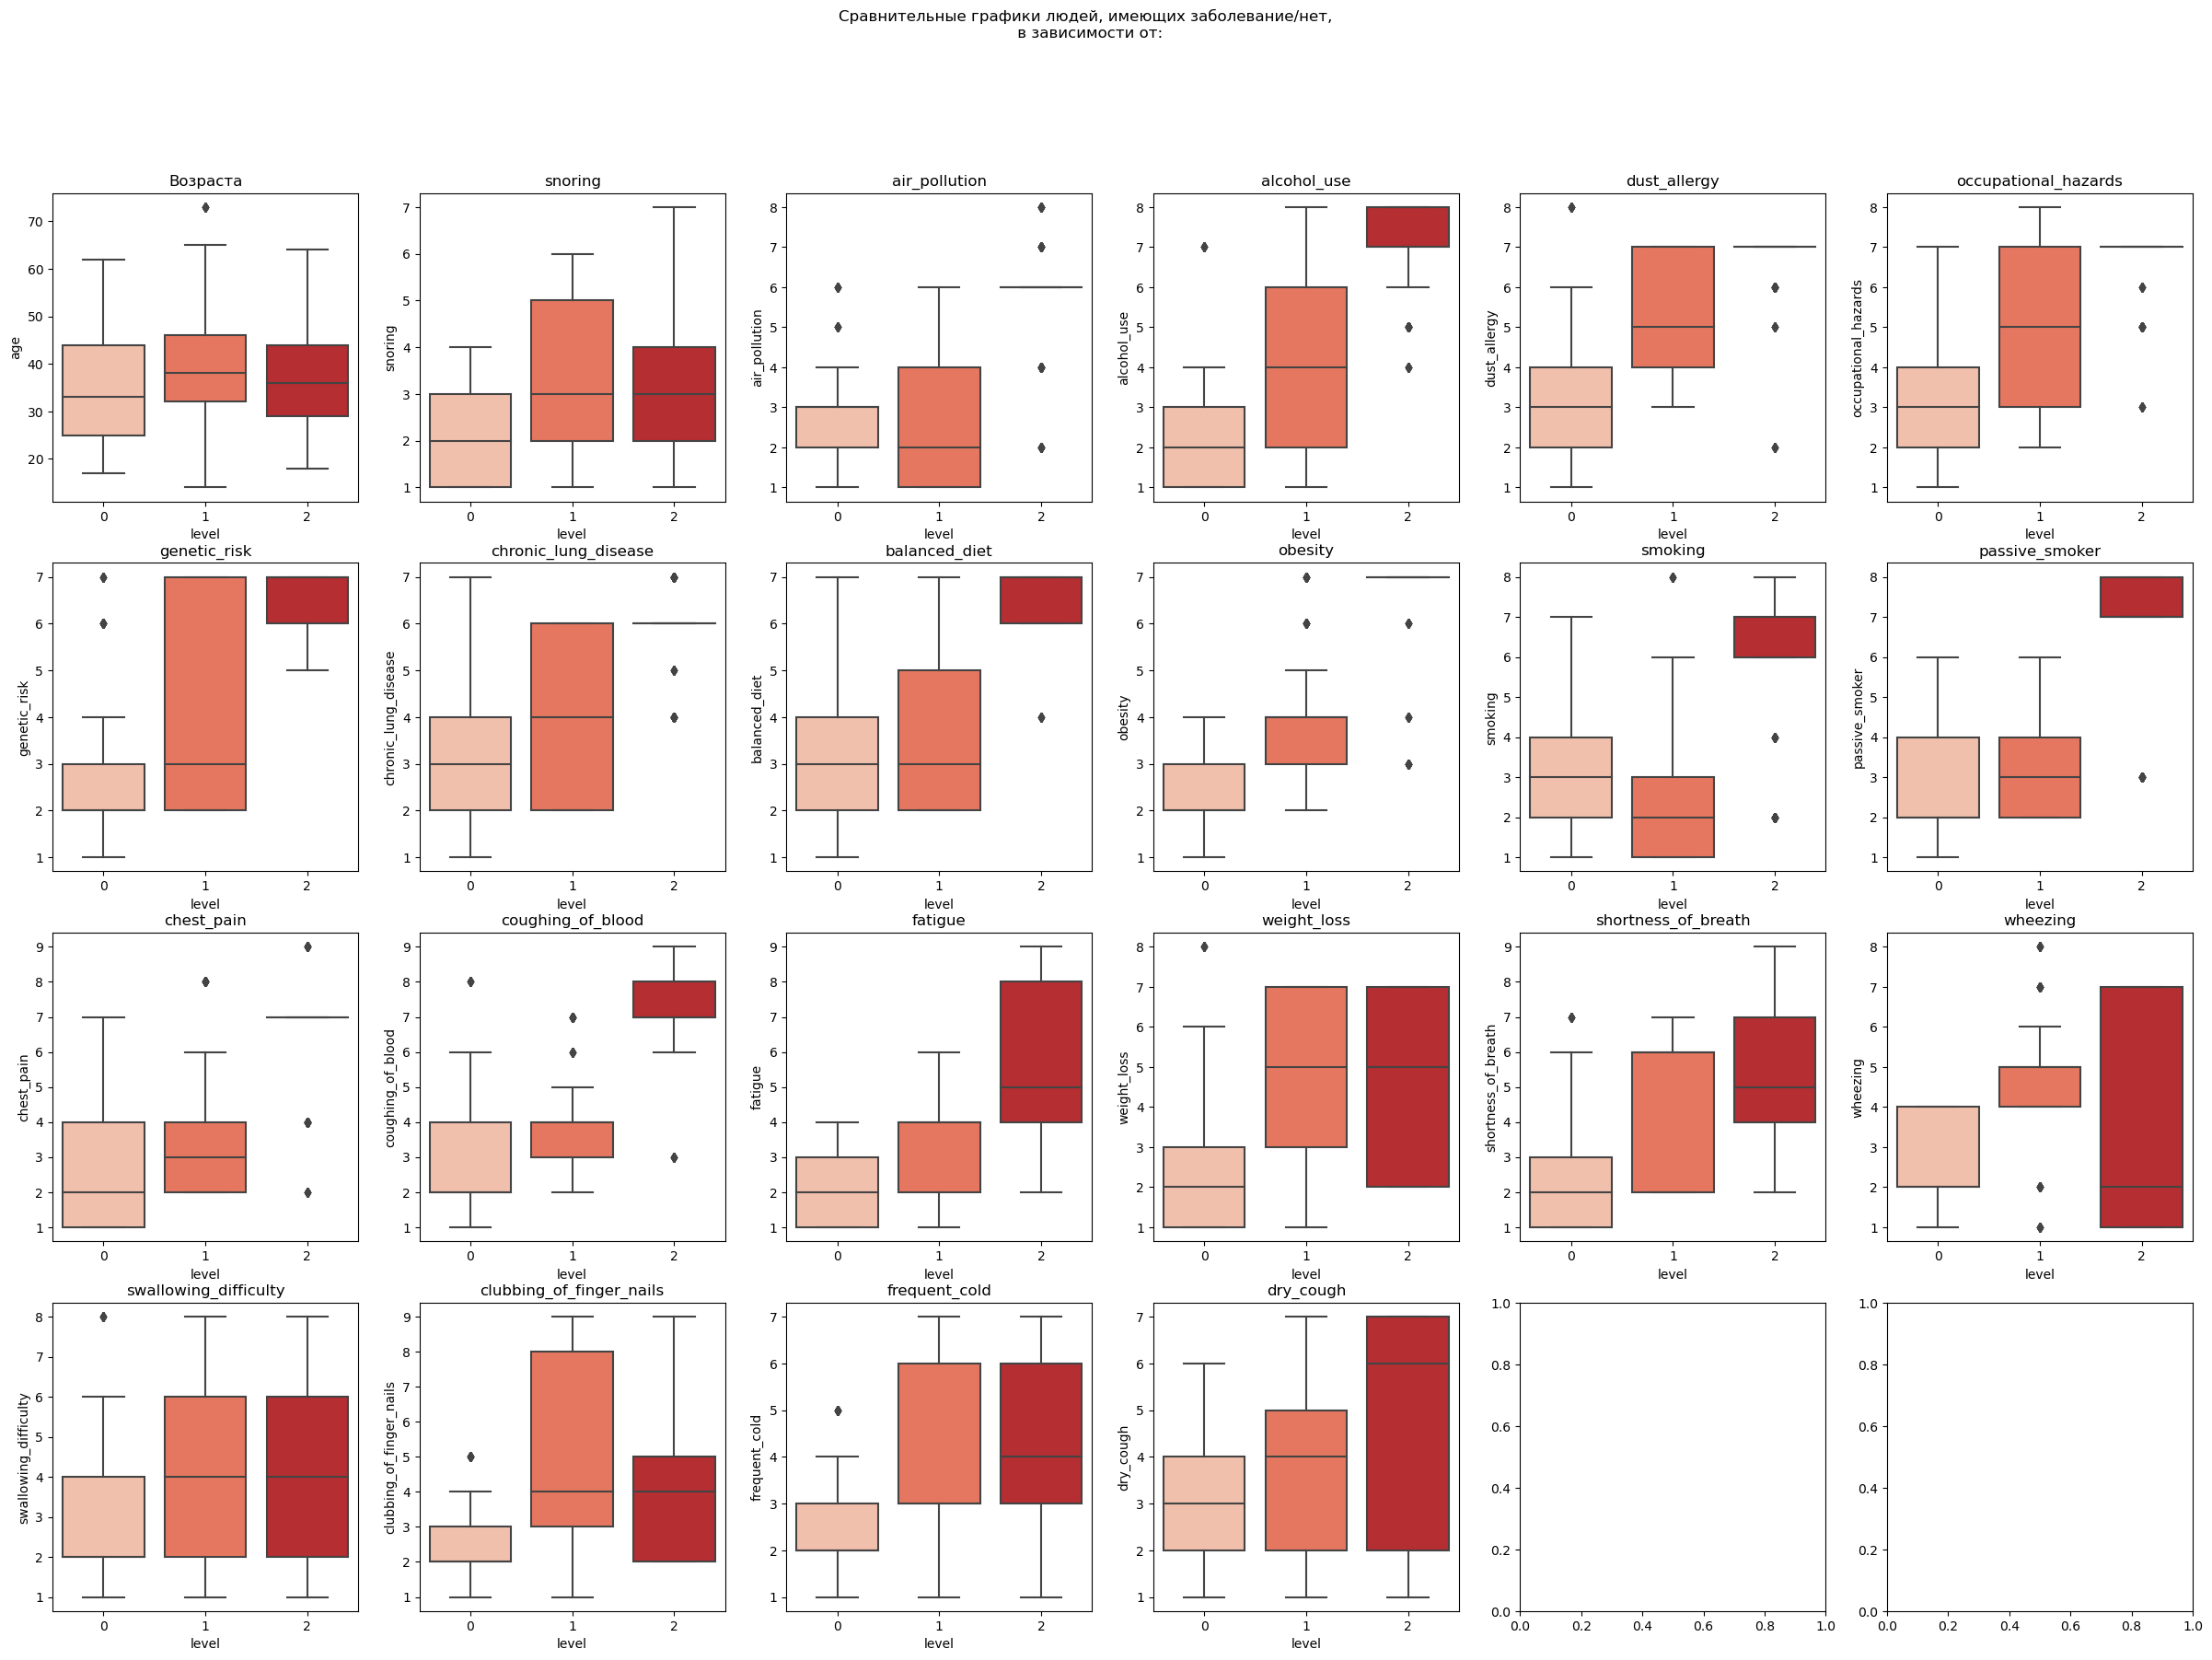

In [73]:
def plot_box(data, col, ax, name):
    sns.boxplot(data = df, x= 'level', y =  col, ax= ax, palette = 'Reds')
    ax.set_title(name)
    plt.show

fig, axes = plt.subplots(4, 6,  figsize=(30, 20))
fig.suptitle('Сравнительные графики людей, имеющих заболевание/нет, \n в зависимости от:')
plot_box(df, 'age', axes[0,0], 'Возраста')
plot_box(df, 'snoring', axes[0,1], 'snoring')
plot_box(df, 'air_pollution', axes[0,2], 'air_pollution')
plot_box(df, 'alcohol_use', axes[0,3], 'alcohol_use')
plot_box(df, 'dust_allergy', axes[0,4], 'dust_allergy')
plot_box(df, 'occupational_hazards', axes[0,5], 'occupational_hazards')
plot_box(df, 'genetic_risk', axes[1,0], 'genetic_risk')
plot_box(df, 'chronic_lung_disease', axes[1,1], 'chronic_lung_disease')
plot_box(df, 'balanced_diet', axes[1,2], 'balanced_diet')
plot_box(df, 'obesity', axes[1,3], 'obesity')
plot_box(df, 'smoking', axes[1,4], 'smoking')
plot_box(df, 'passive_smoker', axes[1,5], 'passive_smoker')
plot_box(df, 'chest_pain', axes[2,0], 'chest_pain')
plot_box(df, 'coughing_of_blood', axes[2,1], 'coughing_of_blood')
plot_box(df, 'fatigue', axes[2,2], 'fatigue')
plot_box(df, 'weight_loss', axes[2,3], 'weight_loss')
plot_box(df, 'shortness_of_breath', axes[2,4], 'shortness_of_breath')
plot_box(df, 'wheezing', axes[2,5], 'wheezing')
plot_box(df, 'swallowing_difficulty', axes[3,0], 'swallowing_difficulty')
plot_box(df, 'clubbing_of_finger_nails', axes[3,1], 'clubbing_of_finger_nails')
plot_box(df, 'frequent_cold', axes[3,2], 'frequent_cold')
plot_box(df, 'dry_cough', axes[3,3], 'dry_cough')

- В общей выборке преобладает возраст 36 лет(более 250), примерно в этом же диапазоне медиана высокого уровня заболевания
- Медиана уровня храпа у здоровых = 2 и верхняя грань не превышает 4 балов (большинство людей из выборки поставили 2 б)
- Уровень загрязнения воздуха при в/у = 6, значительная доля населения живет в этом диапазоне (более 300), у здоровых верхняя грань не превышает 4 балов
- Высокий уровнь развития рака легких также характеризуется: Употребление алкоголя от 6 балов, Аллергия на пыль = 7, Профессиональные опасности = 7, генетический риск от 5 (с низким ур - не превышает 4 б.), Хроническое заболевание легких = 6 (есть выбросы), Сбалансированное питание 6-7, Ожирение = 7 (но встречаются случаи и ниже, у здоровых верхняя грань не превышает 4 б), Курение 6-8 (в районе 6-7 также люди и с низким уровнем), Пассивные курильщики 7-8 баллов (н/у и с/у не превыш. 6); Ломкие ногти, Сухой кашель и Затрудненное глотание - медина 4 (у н/у верхняя грань не превышает 4 б).  
Далее менее четкая картина симптоматики, тк идет пересечение со всеми уровнями: Боль в груди = 7, Кашель с кровью 6-9 (н/у, с/у верхняя грань не превышает 6 б.), Усталость и Сухой кашель- тенденция - чем выше баллы, тем выше уровень возникновения заболевания, медиана Потеря веса = 5 (как у с/у).  
В данных наблюдаются допустимые выбросы

<Axes: title={'center': 'уровень'}, xlabel='gender', ylabel='count'>

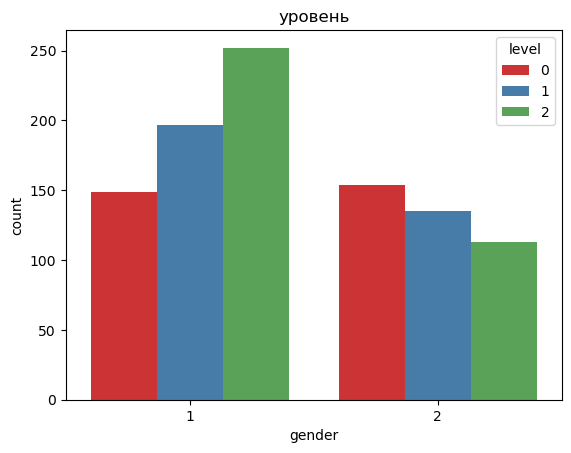

In [74]:
plt.title('уровень')
sns.countplot(data=df, x = 'gender', hue = 'level', palette = 'Set1')

<Axes: title={'center': 'уровень'}, xlabel='gender', ylabel='count'>

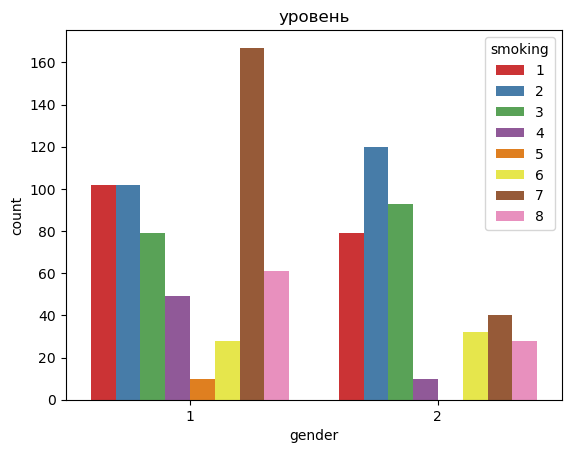

In [75]:
plt.title('уровень')
sns.countplot(data=df, x = 'gender', hue = 'smoking', palette = 'Set1')

*Пояснения к баллам таблицы нет. По большой доле с 7 уровнем курения можно сделать предположение, что группа 1 - мужчины. Тк для женщин чаще характерен невысокий уровень курения  
В 1 группе гендера перобладает высокий риск заболевания

/tmp/ipykernel_32/1698297006.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(7, 5))


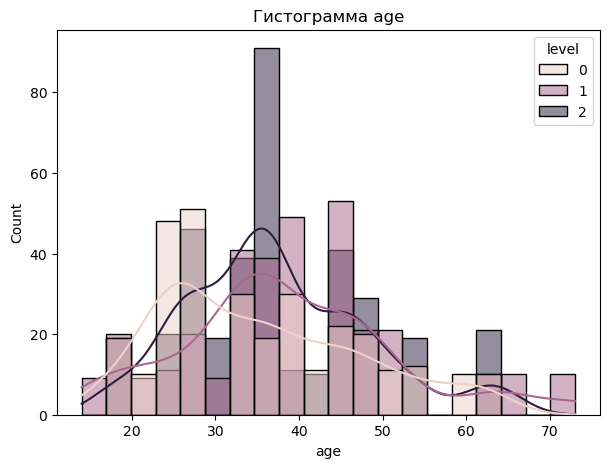

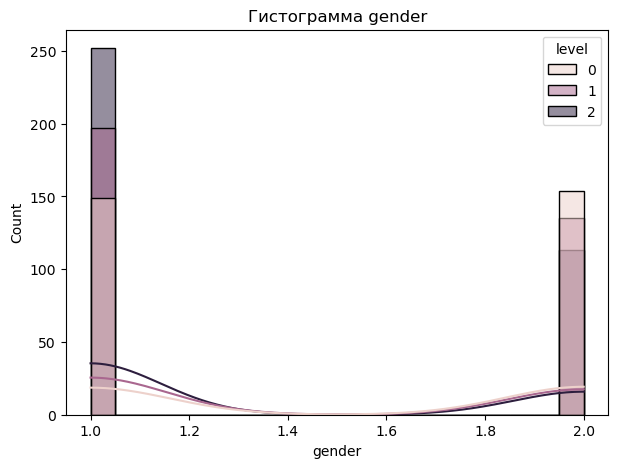

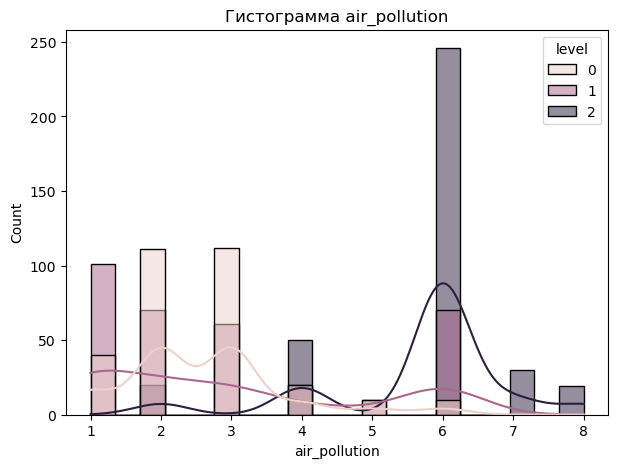

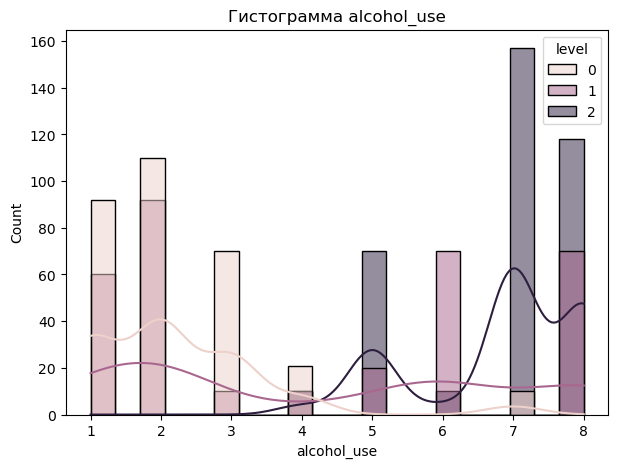

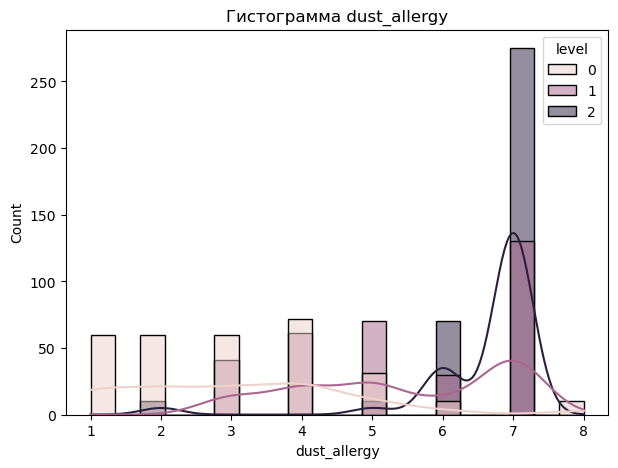

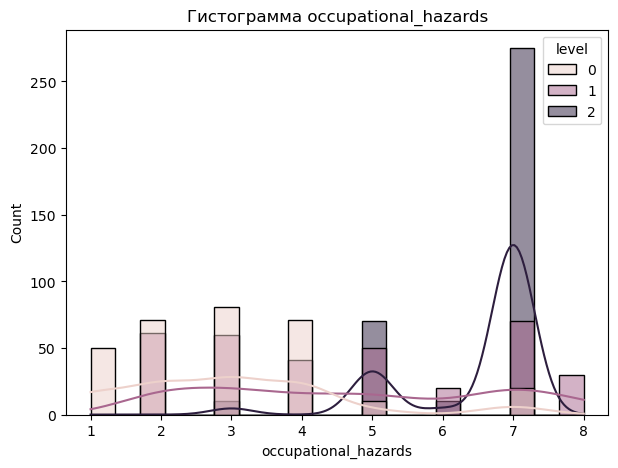

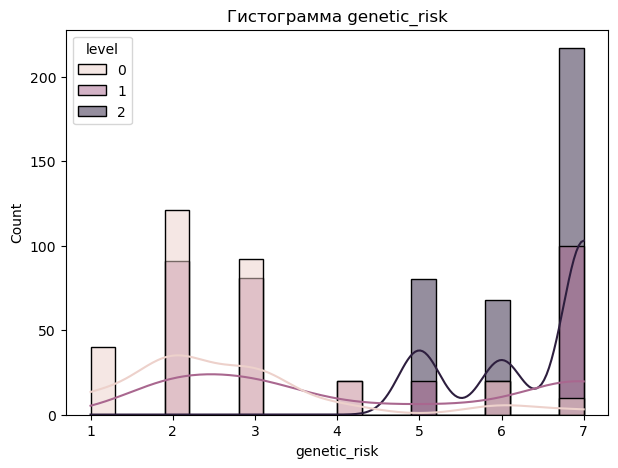

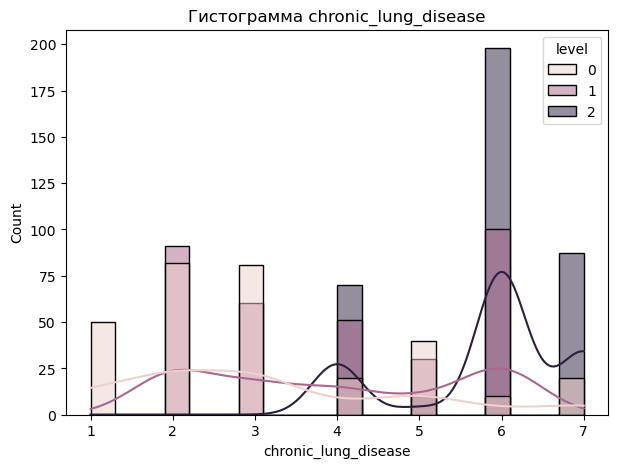

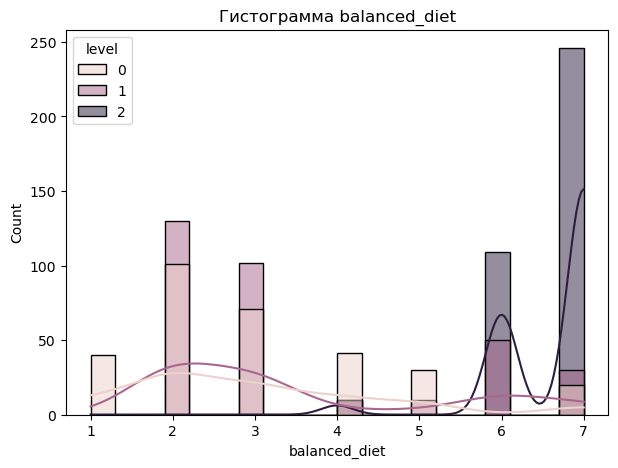

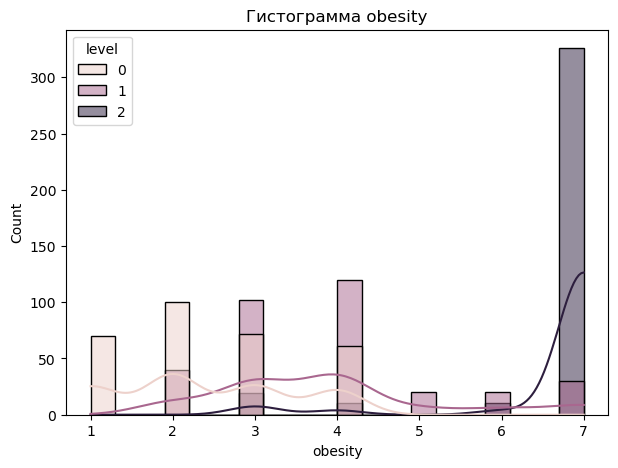

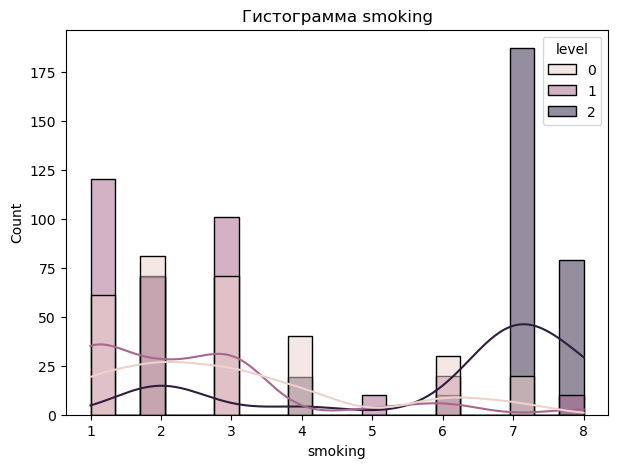

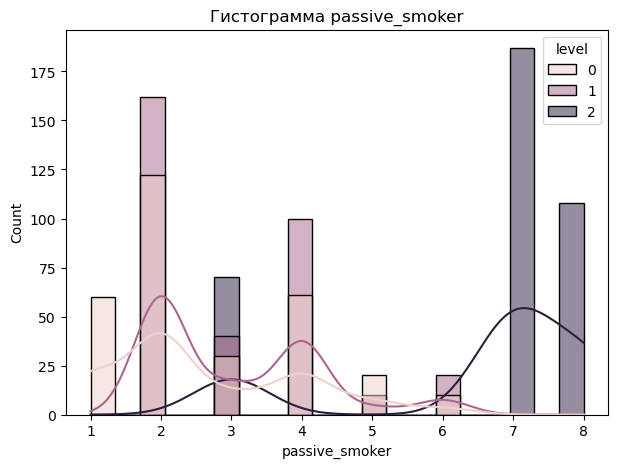

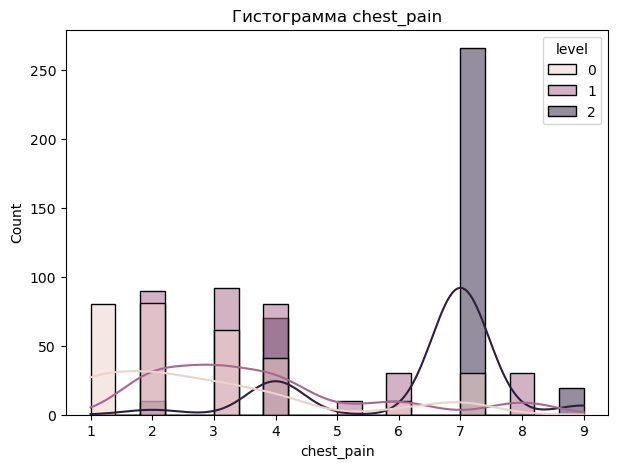

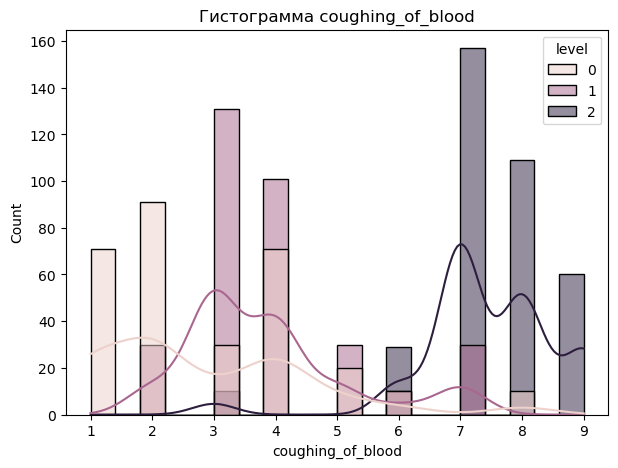

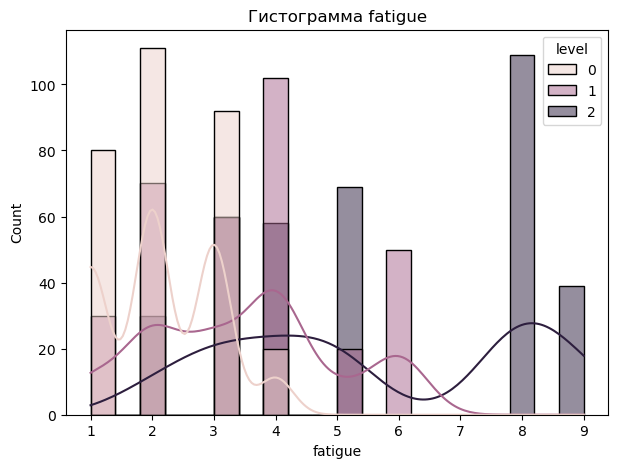

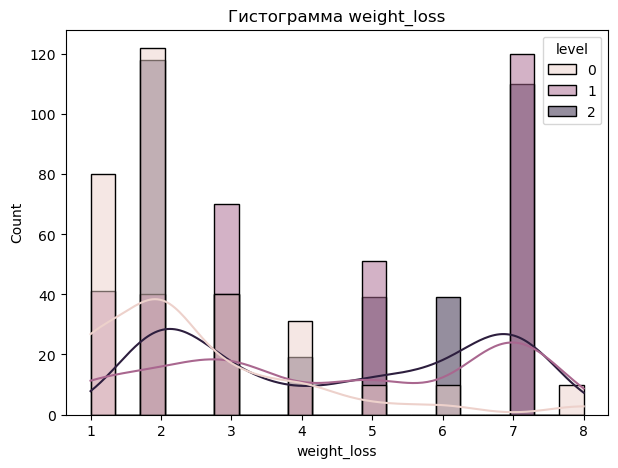

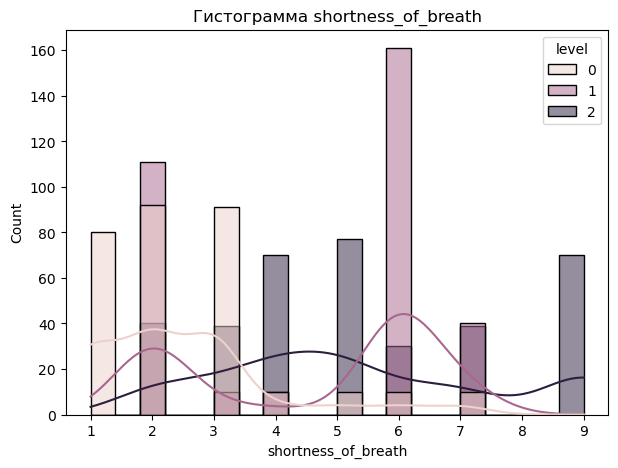

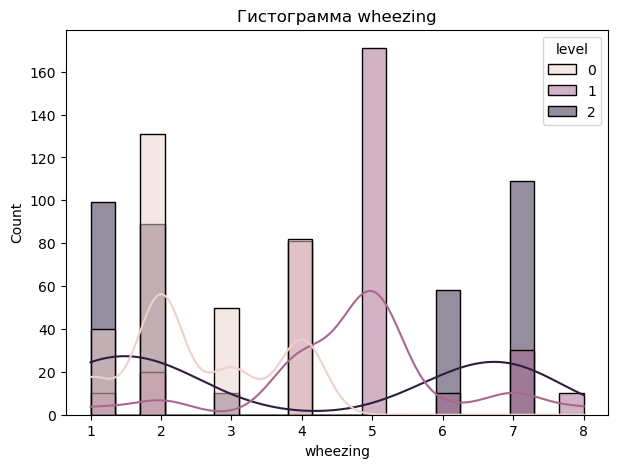

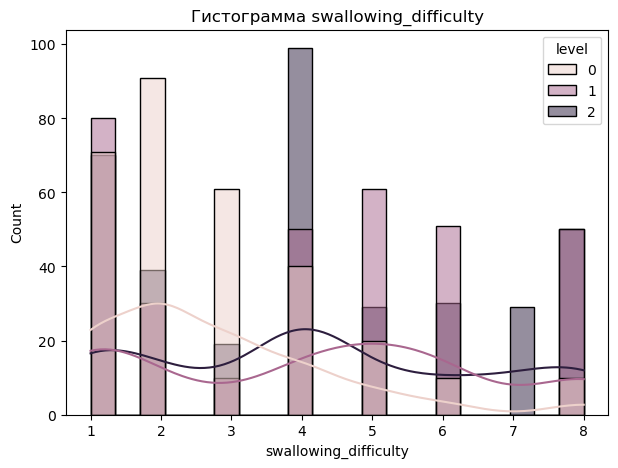

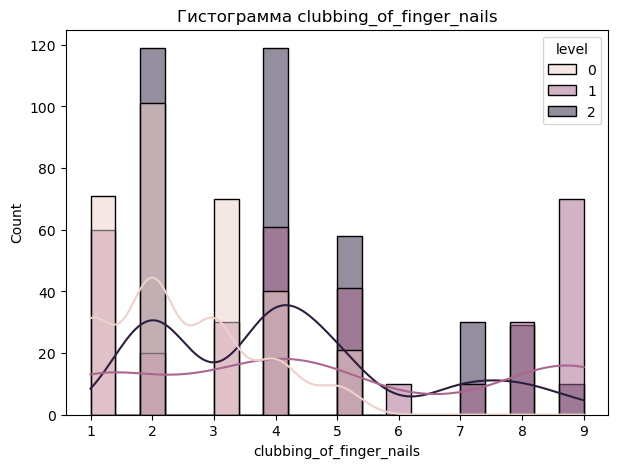

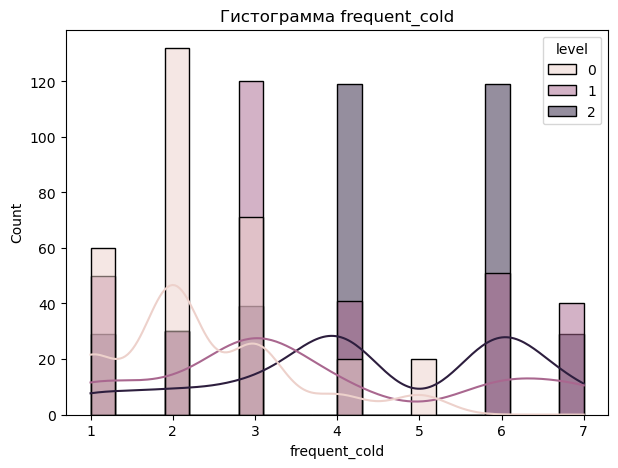

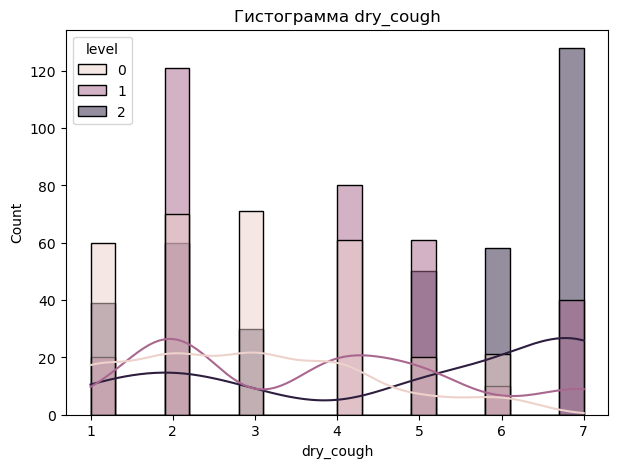

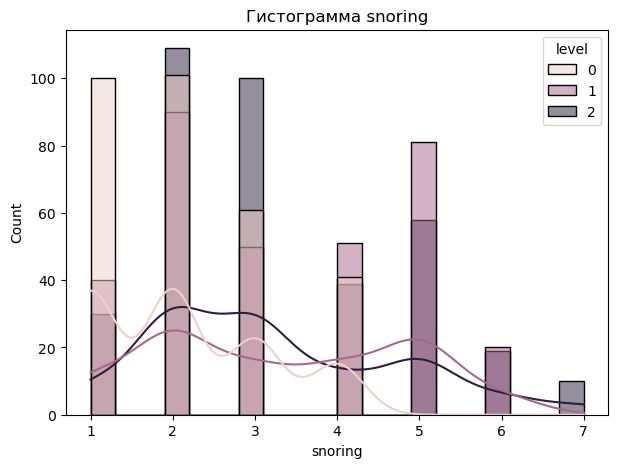

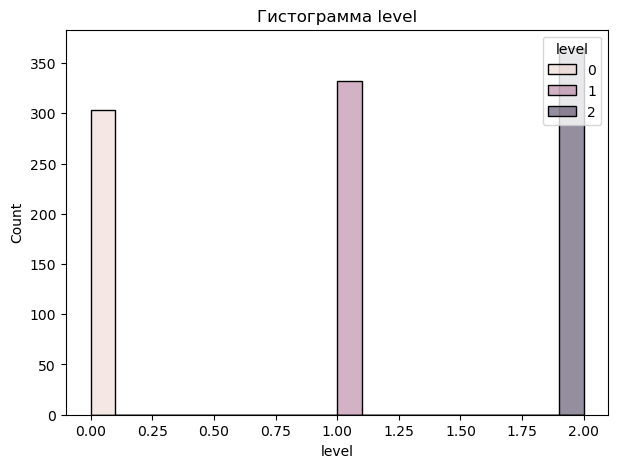

In [76]:
for col in df.select_dtypes(include='number'):
    plt.figure(figsize=(7, 5))
    plt.title(f'Гистограмма {col}')
    sns.histplot(x = col, hue = 'level', bins = 20, kde = True, data = df)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


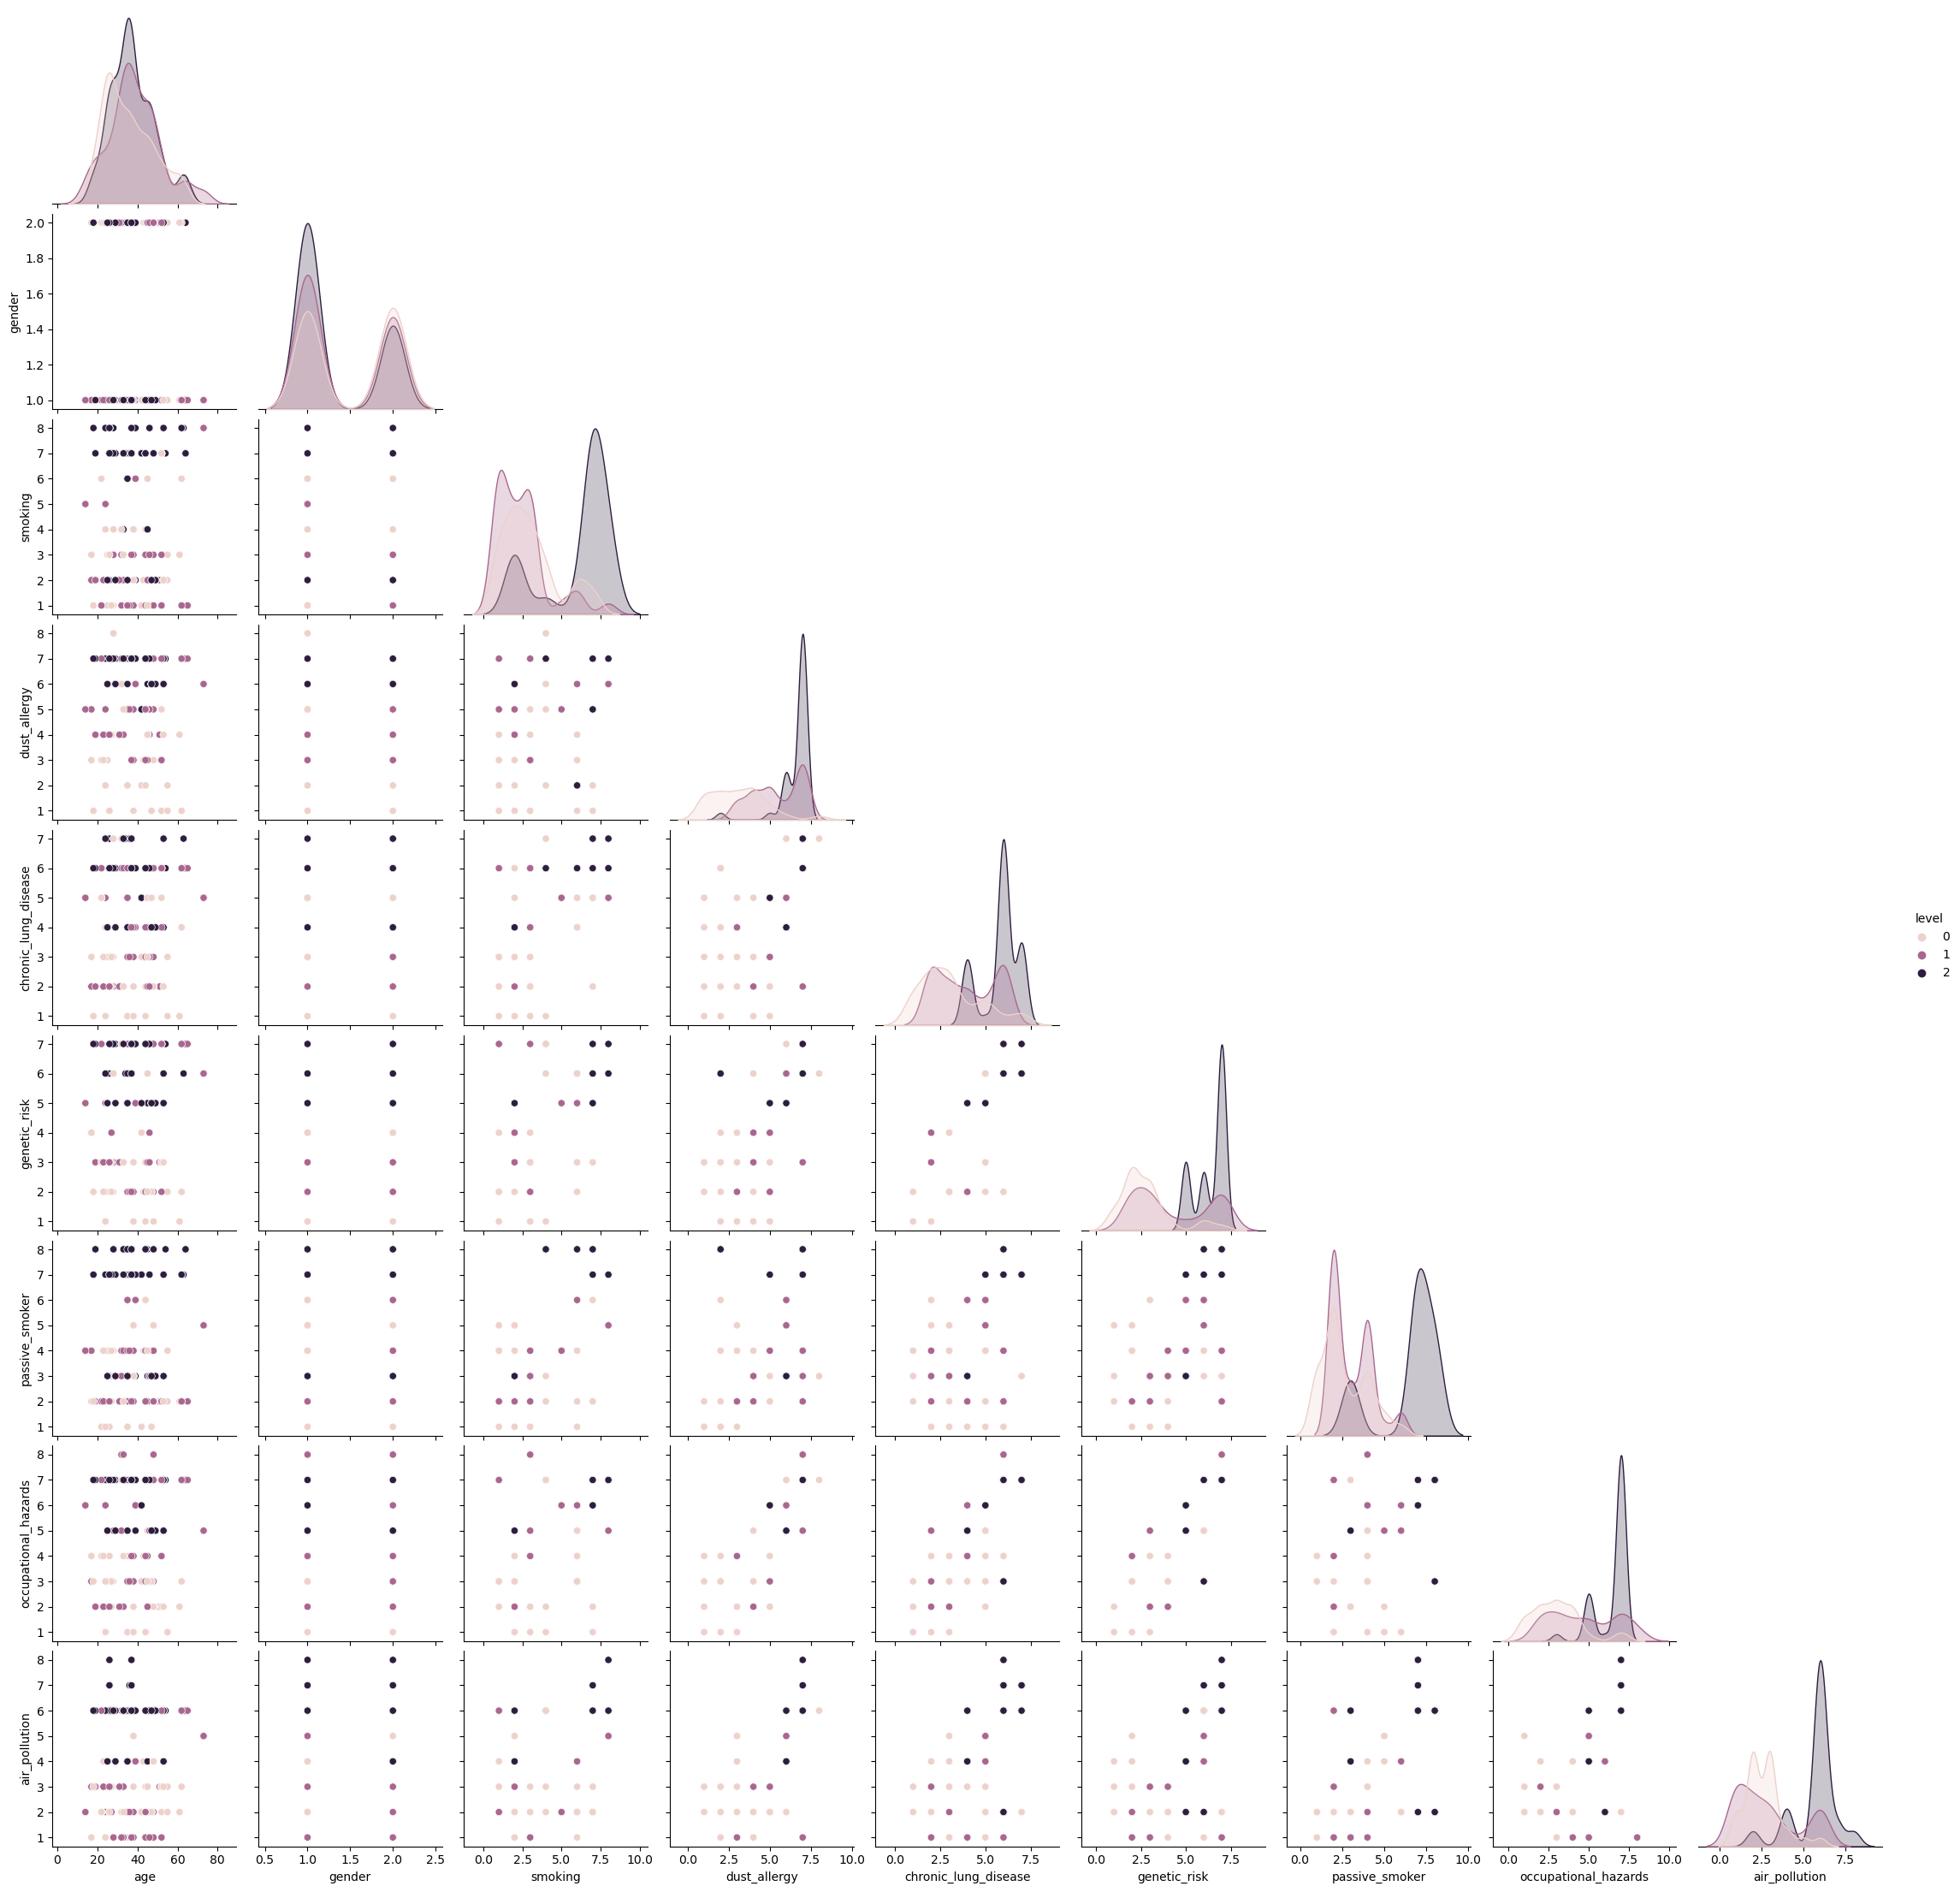

In [77]:
sns.pairplot(df[['age', 'gender', 'smoking', 'dust_allergy', 'chronic_lung_disease', 'genetic_risk', 'passive_smoker', 'occupational_hazards', 'air_pollution','level']], corner=True, hue= 'level')

Генетеческая предрасположенность имеет аутосомный характер(не наследуется по полу) + напрямую отвечает за проявление аллергии на пыльцу и хроническое заболевание легких.  
**Вывод:** 
Большая плотность людей с в/у риска возникновения рака легких при баллах `>=6` в следующих категориях: загрязнение воздуха, употребление алкоголя, аллергия на пыль, профессиональные опасности, генетический риск, хроническое заболевание легких, сбалансированное питание, ожирение, боль в груди  
При загрязнении воздуха 6 б. и выше - высокий уровень возникновения рака легких во всех группах, как и при работе с проф опасностью выше 5.  
В/у при баллах у курильщиков >=6  и у пассивных курильщиков >= 7, т.е. выделяемые вещества влияют на развитие заболевания.

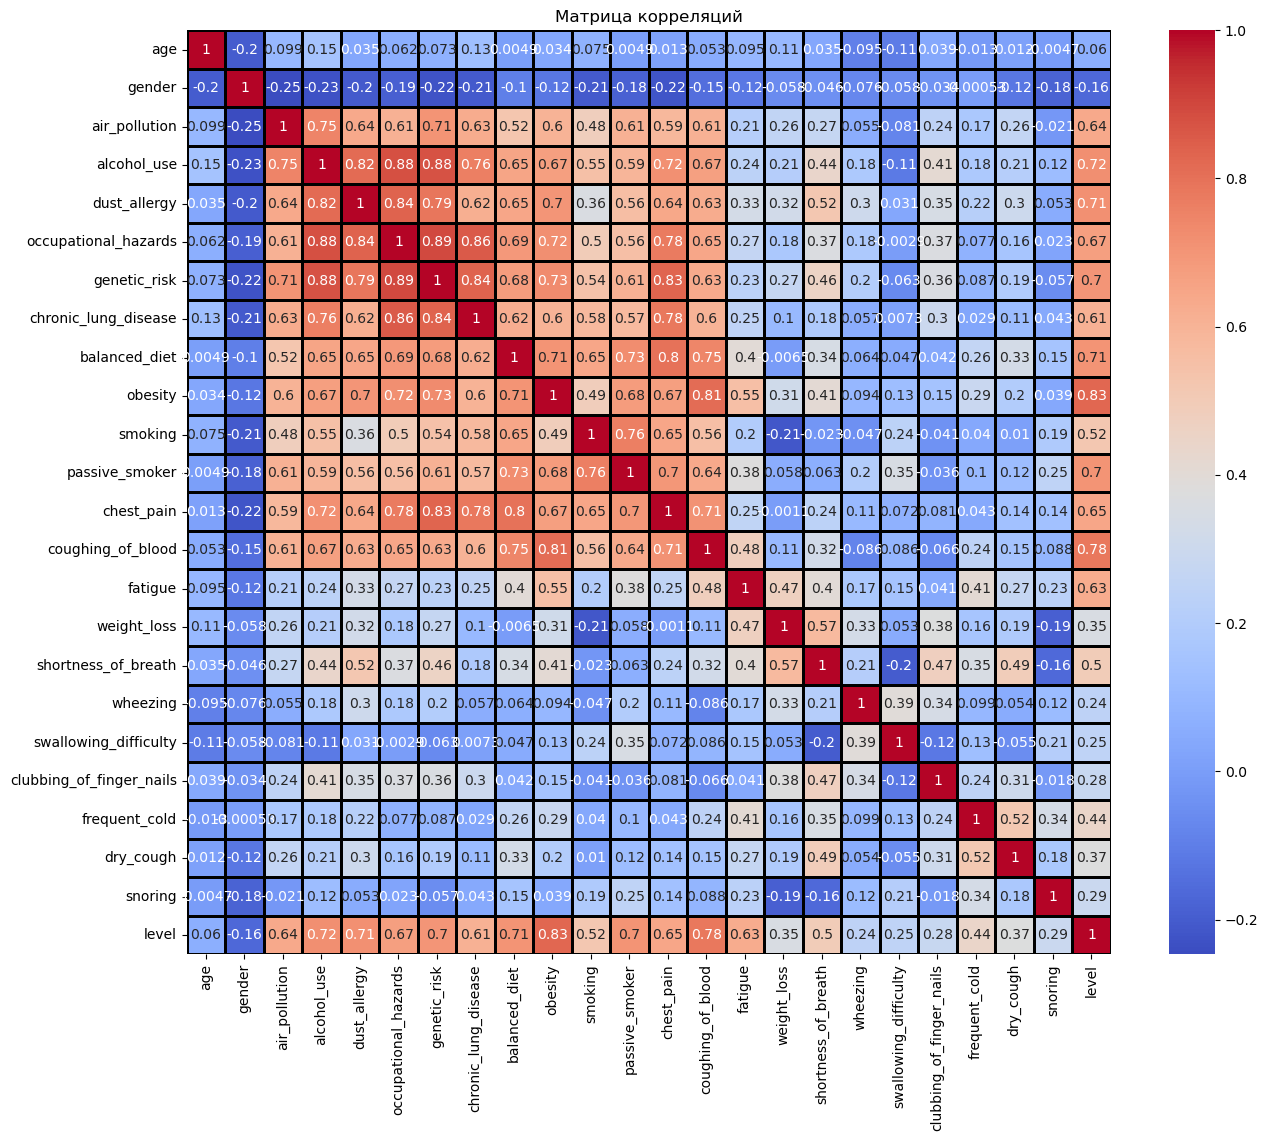

In [78]:
tmp = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(tmp, annot=True, linewidths=1, linecolor='black', cmap='coolwarm')
plt.imshow(tmp)
plt.title('Матрица корреляций')
plt.show()

- Наблюдается мультиколлениальность
- Сильно коррелирующие с целевым признаком фичи: `obesity`(0.83), `coughing_of_blood`(0.78), `alcohol_use`(0.72), `dust_allergy`(0.71)
- Сильно коррелирующие между собой признаки: occupational_hazards + alcohol_use (0.88), alcohol_use + genetic_risk (0.88), occupational_hazards + genetic_risk (0.89), chronic_lung_disease + occupational_hazards (0.86), chronic_lung_disease + genetic_risk (0.84),c hronic_lung_disease +  alcohol_use (0.76)...

## ML

In [79]:
RANDOM_STATE=15

In [80]:
features = df.drop(['level', 'air_pollution', 'dust_allergy', 'occupational_hazards', 'genetic_risk', 'chronic_lung_disease','chest_pain', 'smoking', 'balanced_diet'], axis=1)
target = df['level']

In [81]:
features.shape

(1000, 15)

Уменьшение размерности с помощью LDA (Linear Discriminant Analysis) и метода одномерного выбора признаков - снижает качество модели до 0.708; при попытке удаления 10% низковариативных признаков - ни один объект в features не соответствует пороговому значению дисперсии

In [82]:
x_norm = StandardScaler().fit_transform(features)

In [83]:
X_train, x_test, Y_train, y_test = train_test_split(x_norm, target, 
test_size = 0.25, random_state = RANDOM_STATE)

In [84]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=RANDOM_STATE)

In [85]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(637, 15)
(250, 15)
(113, 15)


In [86]:
def metrics(y_pred, cmap, model):
    print("Precision : %.3f"% precision_score(y_val, y_pred, average = 'micro'))
    print("Recall : %.3f"% recall_score(y_val, y_pred, average = 'micro'))
    print("Accuracy : %.3f"% accuracy_score(y_val, y_pred))
    print("F1 Score : %.3f"%  f1_score(y_val, y_pred, average = 'micro'))
    print("roc_auc_score : %.3f"% roc_auc_score(y_val, model.predict_proba(x_val), multi_class ='ovr'))
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ConfusionMatrixDisplay.from_predictions(y_val, y_pred, ax=ax, display_labels=['Low', 'Medium', 'High'], cmap= cmap)
    _ = ax.set_title(
    f"Confusion Matrix for {model.__class__.__name__}\non the validation")

In [87]:
def metrics_test(y_pred, model):
    print("\n")
    print("Precision : %.3f"% precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : %.3f"% recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : %.3f"% accuracy_score(y_test, y_pred))
    print("F1 Score : %.3f"%  f1_score(y_test, y_pred, average = 'micro'))
    print("roc_auc_score : %.3f"% roc_auc_score(y_test, model.predict_proba(x_test), multi_class ='ovr'))

    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, display_labels=['Low', 'Medium', 'High'], cmap= plt.cm.cool)
    _ = ax.set_title(
    f"Test Confusion Matrix for {model.__class__.__name__}\non the test")

LogisticRegression

Precision : 1.000
Recall : 1.000
Accuracy : 1.000
F1 Score : 1.000
roc_auc_score : 1.000


Precision : 1.000
Recall : 1.000
Accuracy : 1.000
F1 Score : 1.000
roc_auc_score : 1.000


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        99

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

******************************************************



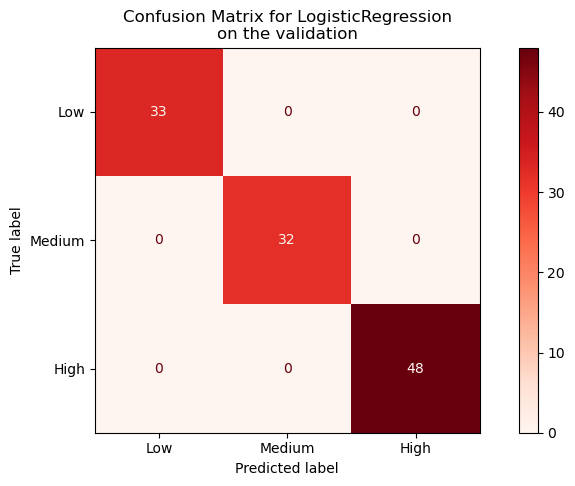

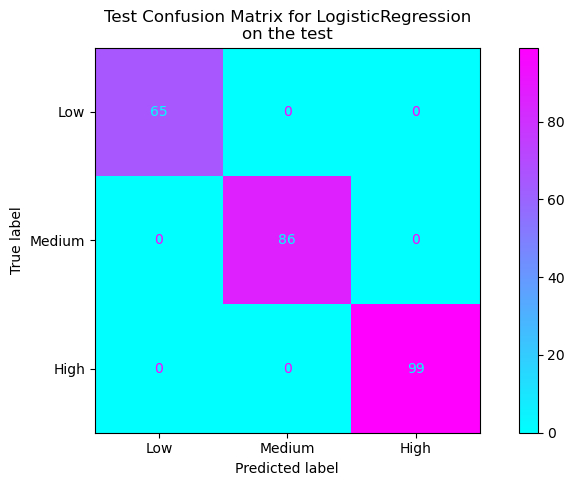

In [88]:
model = LogisticRegression(random_state=RANDOM_STATE, multi_class = 'multinomial', class_weight='balanced')
model.fit(x_train, y_train) 
predict_val = model.predict(x_val)
metrics(predict_val, plt.cm.Reds,model)

predict_test = model.predict(x_test)
metrics_test(predict_test,model)

In [89]:
pd.DataFrame(
    zip(list(features.columns), list(abs(model.coef_[0]))), 
    columns=['feature', 'importance']
).sort_values(by=['importance'], ascending=False).head(10)

,feature,importance
5,coughing_of_blood,1.784640
4,passive_smoker,1.723242
9,wheezing,1.701284
3,obesity,1.587405
11,clubbing_of_finger_nails,1.259733
6,fatigue,1.154682
10,swallowing_difficulty,1.149265
2,alcohol_use,1.126047
14,snoring,0.944604
13,dry_cough,0.886579


LogisticRegressionCV

Precision : 1.000
Recall : 1.000
Accuracy : 1.000
F1 Score : 1.000
roc_auc_score : 1.000


Precision : 1.000
Recall : 1.000
Accuracy : 1.000
F1 Score : 1.000
roc_auc_score : 1.000


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        99

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

******************************************************



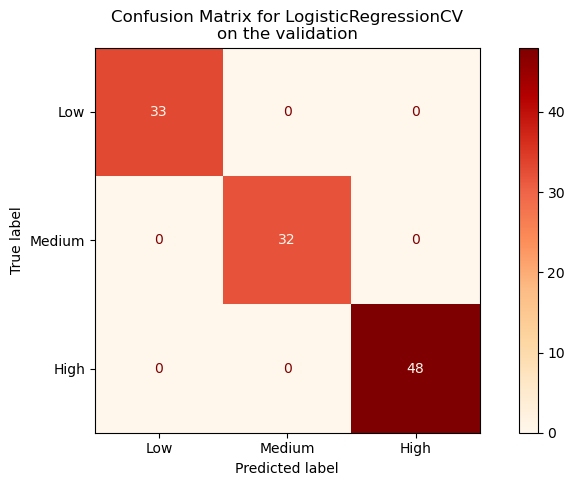

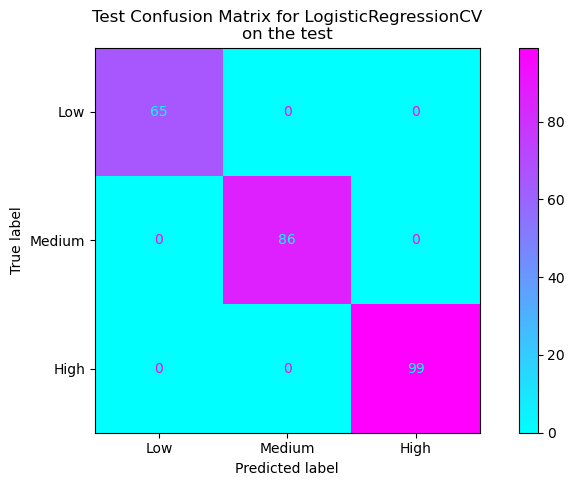

In [90]:
model_lrCV = LogisticRegressionCV(multi_class = 'multinomial', random_state=RANDOM_STATE, class_weight='balanced', cv=10) # Взвешивание классов
model_lrCV.fit(x_train, y_train) 
predict_val = model_lrCV.predict(x_val)
metrics(predict_val, plt.cm.OrRd,model_lrCV)

predict_test = model_lrCV.predict(x_test)
metrics_test(predict_test,model_lrCV)

In [91]:
pd.DataFrame(
    zip(list(features.columns), list(abs(model_lrCV.coef_[0]))), 
    columns=['feature', 'importance']
).sort_values(by=['importance'], ascending=False).head(10)

,feature,importance
5,coughing_of_blood,2.275828
4,passive_smoker,2.258171
9,wheezing,2.106783
3,obesity,1.965304
11,clubbing_of_finger_nails,1.527942
10,swallowing_difficulty,1.480656
2,alcohol_use,1.448349
6,fatigue,1.349005
14,snoring,1.228838
13,dry_cough,1.172137


DecisionTreeClassifier

Precision : 1.000
Recall : 1.000
Accuracy : 1.000
F1 Score : 1.000
roc_auc_score : 1.000


Precision : 1.000
Recall : 1.000
Accuracy : 1.000
F1 Score : 1.000
roc_auc_score : 1.000


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        99

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

******************************************************



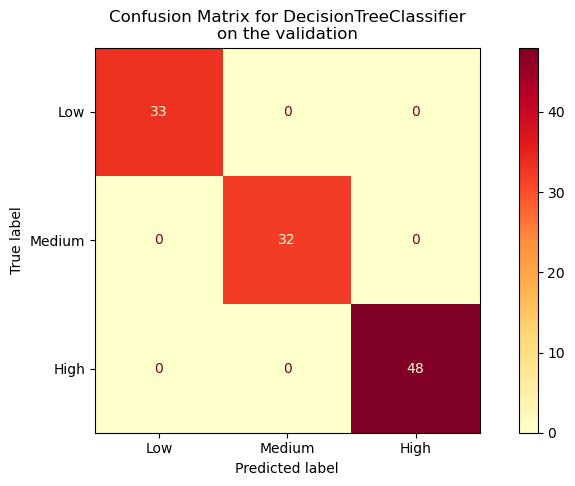

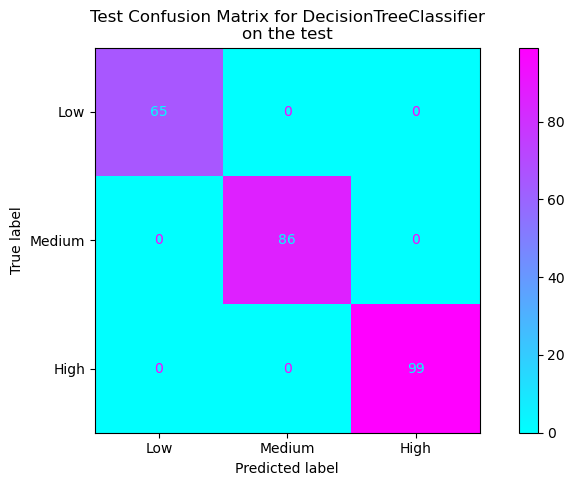

In [92]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train) 
predict_val = model_dt.predict(x_val)
metrics(predict_val, plt.cm.YlOrRd,model_dt)

predict_test = model_dt.predict(x_test)
metrics_test(predict_test,model_dt)

In [93]:
feature_names = df.columns[0:15]
viz = df.copy()
viz["level"]=viz["level"].values.astype(str)
print(viz.dtypes)
target_names = viz['level'].unique().tolist()

age                          int64
gender                       int64
air_pollution                int64
alcohol_use                  int64
dust_allergy                 int64
occupational_hazards         int64
genetic_risk                 int64
chronic_lung_disease         int64
balanced_diet                int64
obesity                      int64
smoking                      int64
passive_smoker               int64
chest_pain                   int64
coughing_of_blood            int64
fatigue                      int64
weight_loss                  int64
shortness_of_breath          int64
wheezing                     int64
swallowing_difficulty        int64
clubbing_of_finger_nails     int64
frequent_cold                int64
dry_cough                    int64
snoring                      int64
level                       object
dtype: object


In [94]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9166666666666666, 'occupational_hazards <= 0.264\ngini = 0.666\nsamples = 637\nvalue = [205, 214, 218]\nclass = 2'),
 Text(0.3125, 0.75, 'obesity <= 0.354\ngini = 0.515\nsamples = 390\nvalue = [192, 192, 6]\nclass = 0'),
 Text(0.25, 0.5833333333333334, 'genetic_risk <= -0.159\ngini = 0.333\nsamples = 241\nvalue = [192, 43, 6]\nclass = 0'),
 Text(0.125, 0.4166666666666667, 'alcohol_use <= 0.016\ngini = 0.042\nsamples = 187\nvalue = [183, 4, 0]\nclass = 0'),
 Text(0.0625, 0.25, 'gini = 0.0\nsamples = 183\nvalue = [183, 0, 0]\nclass = 0'),
 Text(0.1875, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]\nclass = 1'),
 Text(0.375, 0.4166666666666667, 'alcohol_use <= -0.925\ngini = 0.438\nsamples = 54\nvalue = [9, 39, 6]\nclass = 1'),
 Text(0.3125, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0]\nclass = 0'),
 Text(0.4375, 0.25, 'dust_allergy <= 0.781\ngini = 0.231\nsamples = 45\nvalue = [0, 39, 6]\nclass = 1'),
 Text(0.375, 0.08333333333333333, 'gini = 0.0\nsamples = 39\nvalu

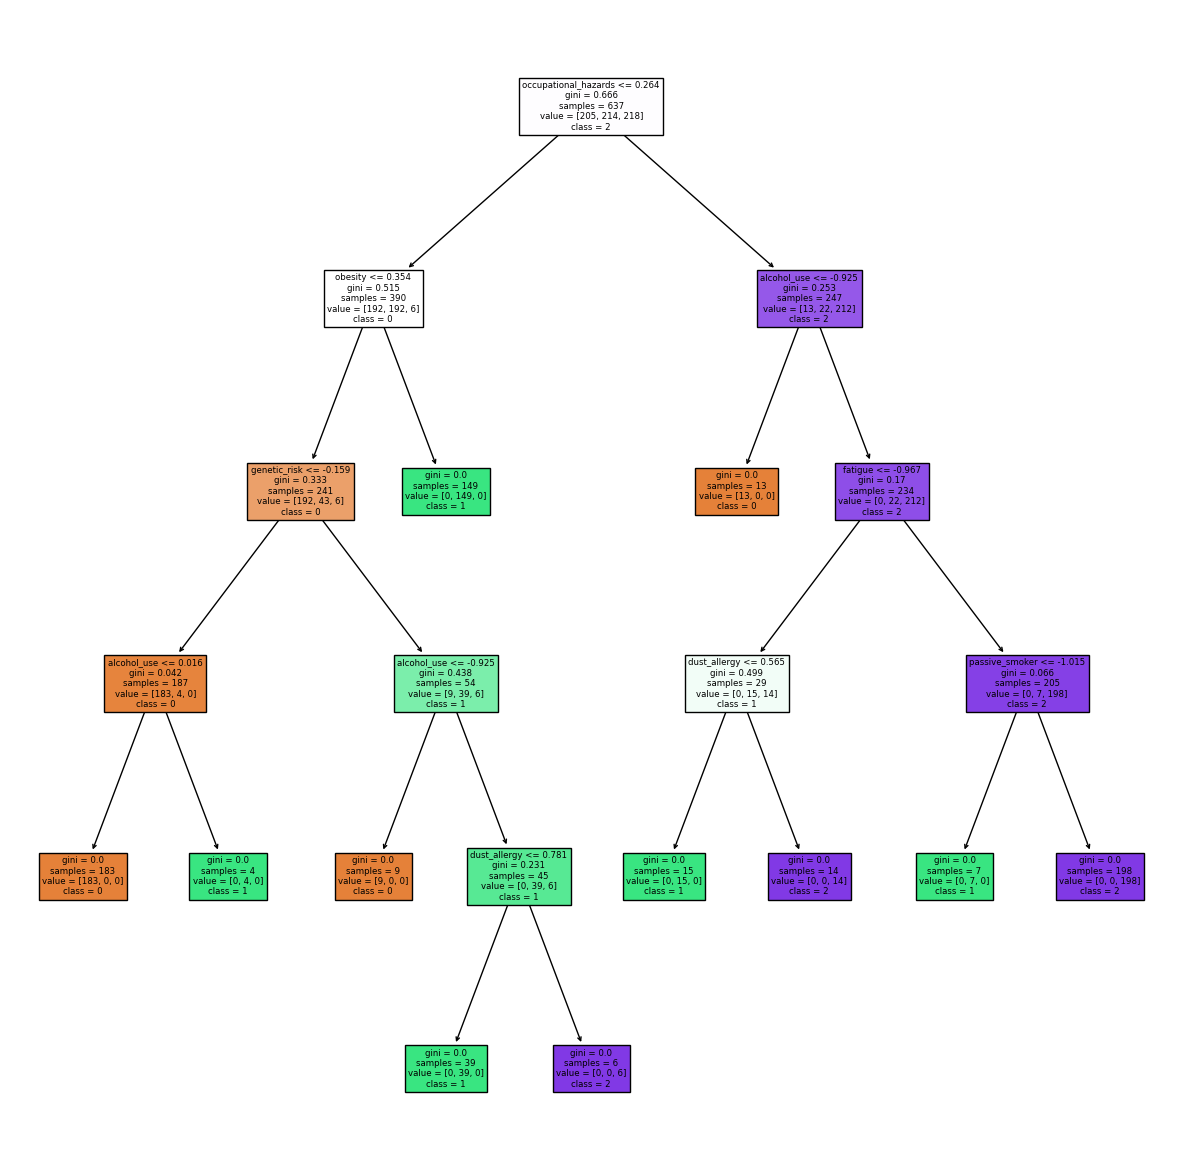

In [95]:
plt.figure(figsize=(15,15))
plot_tree(model_dt, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)

ExtraTreeClassifier

Precision : 1.000
Recall : 1.000
Accuracy : 1.000
F1 Score : 1.000
roc_auc_score : 1.000


Precision : 1.000
Recall : 1.000
Accuracy : 1.000
F1 Score : 1.000
roc_auc_score : 1.000


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        99

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

******************************************************



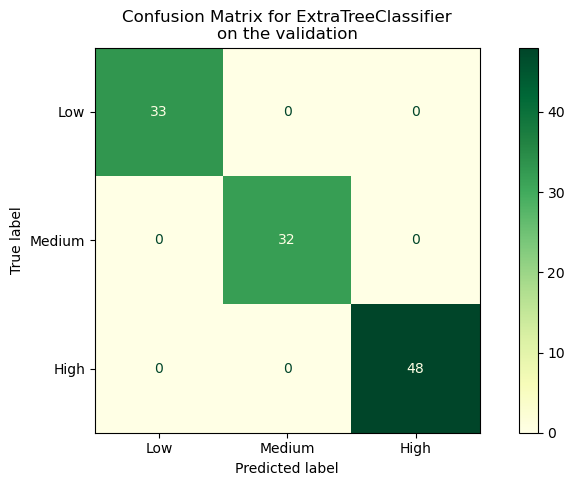

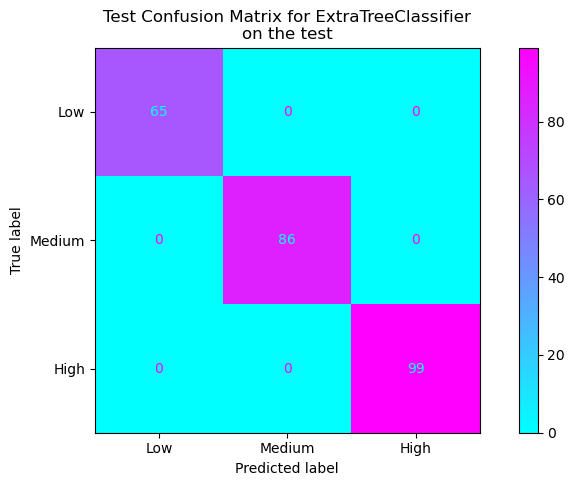

In [96]:
model_et= ExtraTreeClassifier(random_state=0)
model_et.fit(x_train, y_train) 
predict_val = model_et.predict(x_val)
metrics(predict_val, plt.cm.YlGn, model_et)

predict_test = model_dt.predict(x_test)
metrics_test(predict_test, model_et)

In [97]:
def metrics2(y_pred, cmap, model):
    print("Precision : %.3f"% precision_score(y_val, y_pred, average = 'micro'))
    print("Recall : %.3f"% recall_score(y_val, y_pred, average = 'micro'))
    print("Accuracy : %.3f"% accuracy_score(y_val, y_pred))
    print("F1 Score : %.3f"%  f1_score(y_val, y_pred, average = 'micro'))
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ConfusionMatrixDisplay.from_predictions(y_val, y_pred, ax=ax, display_labels=['Low', 'Medium', 'High'], cmap= cmap)
    _ = ax.set_title(
    f"Confusion Matrix for {model.__class__.__name__}\non the validation ")

In [98]:
def metrics_test2(y_pred, model):
    print("\n")
    print("Precision : %.3f"% precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : %.3f"% recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : %.3f"% accuracy_score(y_test, y_pred))
    print("F1 Score : %.3f"%  f1_score(y_test, y_pred, average = 'micro'))

    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, display_labels=['Low', 'Medium', 'High'], cmap= plt.cm.cool)
    _ = ax.set_title(
    f"Test Confusion Matrix for {model.__class__.__name__}\non the test")

RidgeClassifier

Precision : 0.903
Recall : 0.903
Accuracy : 0.903
F1 Score : 0.903


Precision : 0.904
Recall : 0.904
Accuracy : 0.904
F1 Score : 0.904


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        65
           1       0.94      0.77      0.85        86
           2       0.87      1.00      0.93        99

    accuracy                           0.90       250
   macro avg       0.91      0.90      0.90       250
weighted avg       0.91      0.90      0.90       250

******************************************************



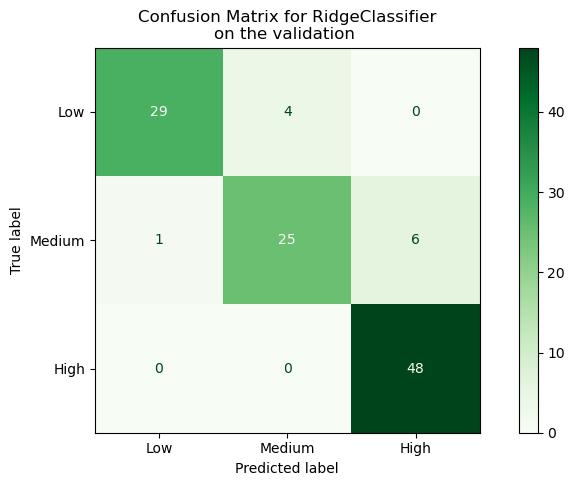

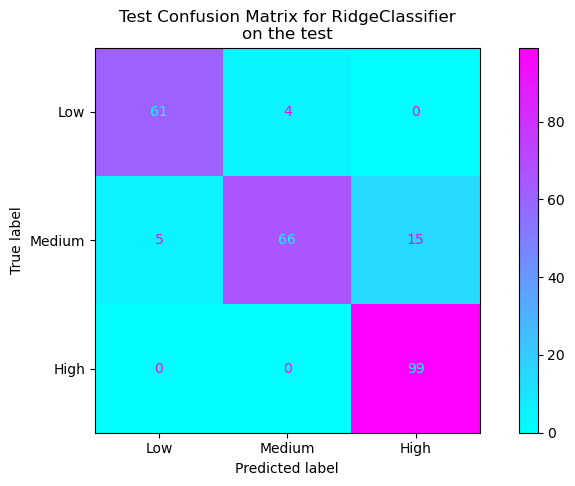

In [99]:
model_rc = RidgeClassifier(tol=1e-2, solver="sparse_cg", class_weight='balanced')
model_rc.fit(x_train, y_train) 
predict_val = model_rc.predict(x_val)
metrics2(predict_val, plt.cm.Greens, model_rc)

predict_test = model_rc.predict(x_test)
metrics_test2(predict_test, model_rc)

In [100]:
pd.DataFrame(
    zip(list(features.columns), list(abs(model_rc.coef_[0]))), 
    columns=['feature', 'importance']
).sort_values(by=['importance'], ascending=False).head(10)

,feature,importance
14,snoring,0.355012
5,coughing_of_blood,0.243734
10,swallowing_difficulty,0.233866
8,shortness_of_breath,0.232455
3,obesity,0.215464
11,clubbing_of_finger_nails,0.147674
9,wheezing,0.132887
4,passive_smoker,0.125495
7,weight_loss,0.110432
2,alcohol_use,0.097567


GradientBoostingClassifier

Precision : 1.000
Recall : 1.000
Accuracy : 1.000
F1 Score : 1.000


Precision : 1.000
Recall : 1.000
Accuracy : 1.000
F1 Score : 1.000


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        99

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

******************************************************



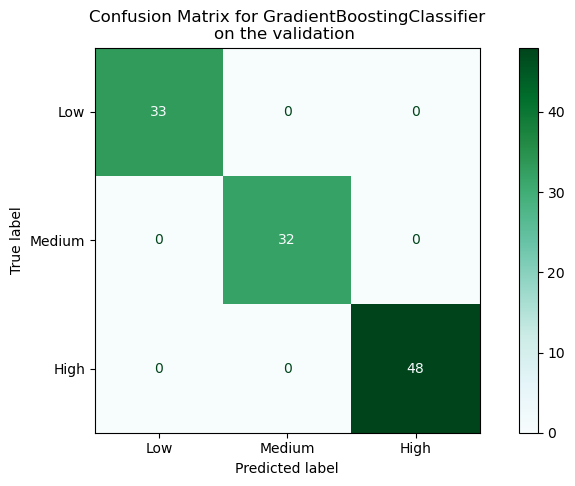

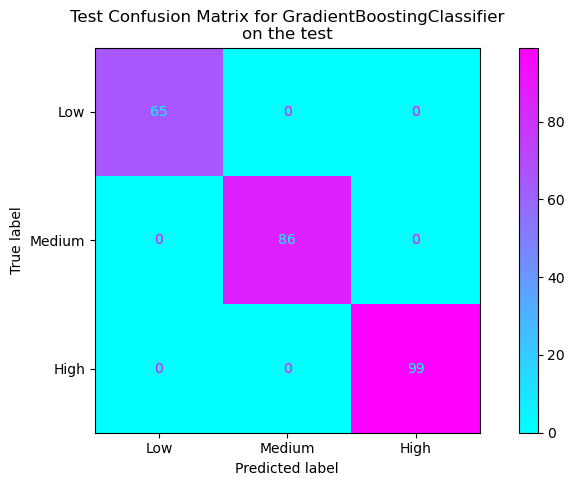

In [101]:
model_clf = GradientBoostingClassifier(n_estimators=30, learning_rate=0.8, max_depth=4, random_state=0).fit(x_train, y_train)
model_clf.fit(x_train, y_train) 
predict_val = model_clf.predict(x_val)
metrics2(predict_val, plt.cm.BuGn, model_clf)

predict_test = model_clf.predict(x_test)
metrics_test2(predict_test, model_clf)

RandomForestClassifier

In [102]:
params = { 
    'n_estimators': range(1, 10,3),
    'max_depth':range(1,10, 2),
    'min_samples_leaf':range(1,10),
    'min_samples_split':range(1,10)
    }

In [103]:
model = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1, class_weight='balanced')
gs=GridSearchCV(estimator=model, param_grid=params, cv=10)
gs.fit(x_train, y_train)
gs.best_params_

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 4}

Precision : 1.000
Recall : 1.000
Accuracy : 1.000
F1 Score : 1.000


Precision : 1.000
Recall : 1.000
Accuracy : 1.000
F1 Score : 1.000


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        99

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

******************************************************



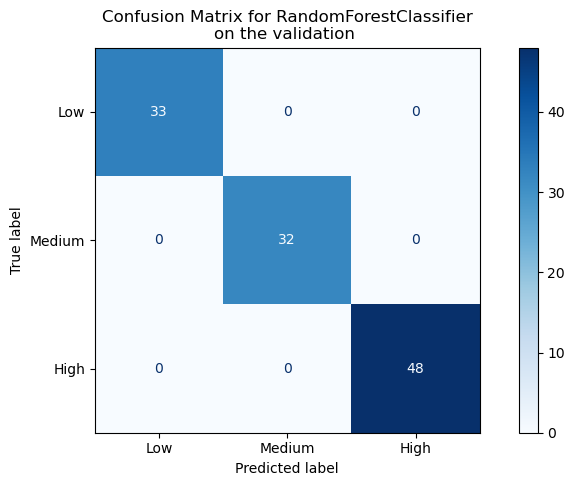

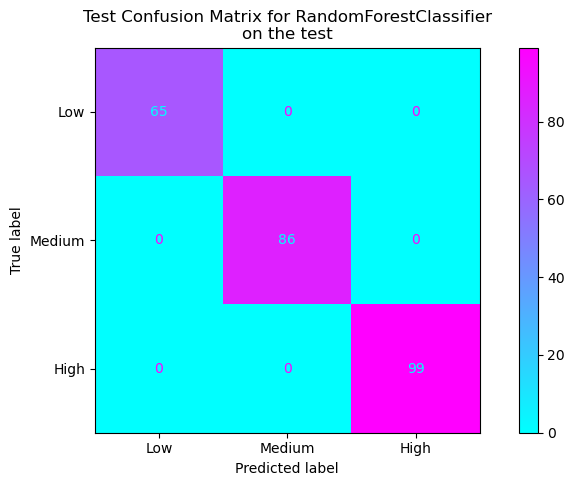

In [104]:
best_model = gs.best_estimator_
predict_val = best_model.predict(x_val)
metrics2(predict_val, plt.cm.Blues, best_model)

predict_test = best_model.predict(x_test)
metrics_test2(predict_test, best_model)

In [105]:
importances = gs.best_estimator_.feature_importances_
importances = pd.DataFrame({'features': features.columns,
                             'importance':importances})
importances.sort_values(by='importance', ascending=False).head(10)

,features,importance
3,obesity,0.273268
9,wheezing,0.146772
5,coughing_of_blood,0.120809
14,snoring,0.100760
4,passive_smoker,0.084780
2,alcohol_use,0.075009
6,fatigue,0.062480
7,weight_loss,0.047300
12,frequent_cold,0.045672
11,clubbing_of_finger_nails,0.021616


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


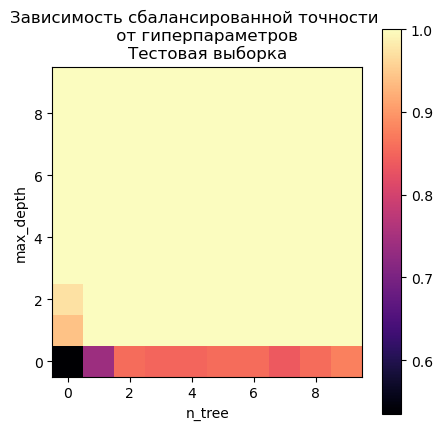

In [106]:
# перебор гиперпараметров количества деревьев и глубины
res = []
for max_depth in range(1, 30, 3):
    for n_tree in range(1, 30, 3):
        model = RandomForestClassifier(n_estimators = n_tree, max_depth =
                                       max_depth, min_samples_leaf=2, random_state=RANDOM_STATE)

        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)

        res.append([max_depth, n_tree, balanced_accuracy_score(pred_train,
         y_train), balanced_accuracy_score(pred_test, y_test)])
    
    res_pd = pd.DataFrame(res, columns=['max_depth', 'n_tree',
                          'accuracy_train', 'accuracy_test'])

plt.figure(figsize=(5,5))
plt.imshow(res_pd.pivot(index = 'max_depth', columns = 'n_tree', values =
                        'accuracy_test'), cmap='magma', aspect='equal',
                         origin="lower")
plt.xlabel('n_tree')
plt.ylabel('max_depth')
plt.title('Зависимость сбалансированной точности \
    \n от гиперпараметров \nТестовая выборка')
plt.colorbar()
plt.show()

XGBClassifier

In [107]:
classifier = XGBClassifier(n_estimators=15, max_depth=3, learning_rate=0.4)
parameters = {'n_estimators': [5, 10, 15],
              'max_depth': (1, 10,3),
              'learning_rate': (0.4, 1, 0.2),
              }
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           cv = 5)
grid_search = grid_search.fit(x_train, y_train, verbose = 0)

In [108]:
print("Best Parameters: " + str(grid_search.best_params_))
print("Best score: " + str(grid_search.best_score_))

Best Parameters: {'learning_rate': 0.4, 'max_depth': 10, 'n_estimators': 5}
Best score: 1.0


Precision : 1.000
Recall : 1.000
Accuracy : 1.000
F1 Score : 1.000


Precision : 1.000
Recall : 1.000
Accuracy : 1.000
F1 Score : 1.000


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        99

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

******************************************************



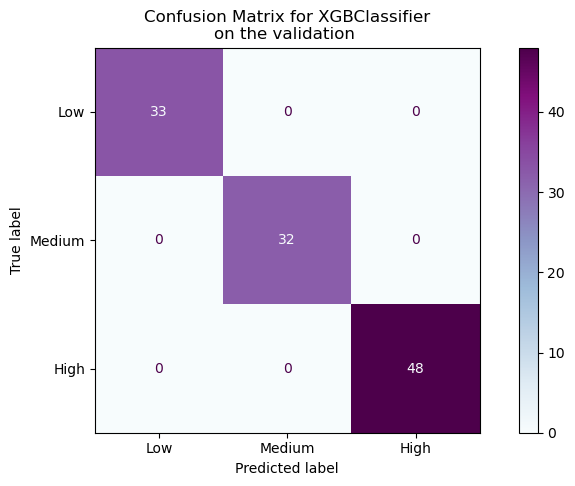

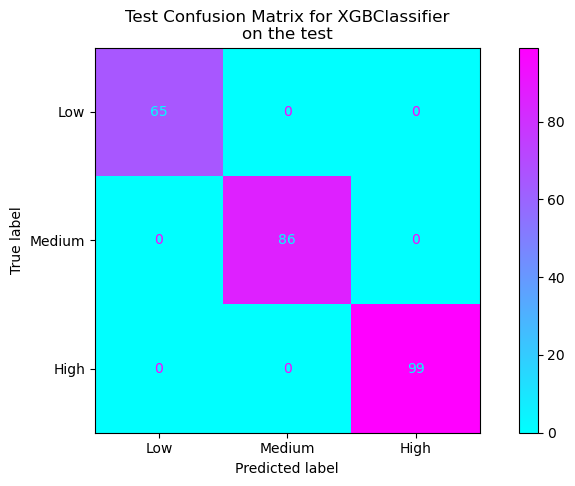

In [109]:
best_model2 = grid_search.best_estimator_
pred_test_b = best_model2.predict(x_val)
metrics2(pred_test_b,plt.cm.BuPu,best_model2)

predict_test = best_model.predict(x_test)
metrics_test2(predict_test, best_model2)

In [110]:
importances = grid_search.best_estimator_.feature_importances_
importances = pd.DataFrame({'features': features.columns,
                             'importance':importances})
importances.sort_values(by='importance', ascending=False).head(10)

,features,importance
5,coughing_of_blood,0.332206
2,alcohol_use,0.143231
6,fatigue,0.141065
9,wheezing,0.107026
4,passive_smoker,0.093935
14,snoring,0.065335
0,age,0.044941
11,clubbing_of_finger_nails,0.030695
3,obesity,0.023832
12,frequent_cold,0.017734


Мы получили идеально предсказывающие модели LogisticRegression, LogisticRegressionCV, DecisionTreeClassifier, ExtraTreeClassifier, GradientBoostingClassifier, RandomForestClassifier c gfhfvtnhfvb {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 4}, XGBClassifier. Наиболее важные общие признаки: coughing_of_blood, wheezing, passive_smoker, obesity